In [ ]:
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score as acc
from sklearn.metrics import f1_score as f1

import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Копия SWaT_Dataset_Attack_v0.csv')
data

,Timestamp,FIT101,LIT101,MV101,P101,P102,AIT201,AIT202,AIT203,FIT201,...,P501,P502,PIT501,PIT502,PIT503,FIT601,P601,P602,P603,Normal/Attack
0,28/12/2015 10:00:00 AM,2.427057,522.8467,2,2,1,262.0161,8.396437,328.6337,2.445391,...,2,1,250.8652,1.649953,189.5988,0.000128,1,1,1,Normal
1,28/12/2015 10:00:01 AM,2.446274,522.8860,2,2,1,262.0161,8.396437,328.6337,2.445391,...,2,1,250.8652,1.649953,189.6789,0.000128,1,1,1,Normal
2,28/12/2015 10:00:02 AM,2.489191,522.8467,2,2,1,262.0161,8.394514,328.6337,2.442316,...,2,1,250.8812,1.649953,189.6789,0.000128,1,1,1,Normal
3,28/12/2015 10:00:03 AM,2.534350,522.9645,2,2,1,262.0161,8.394514,328.6337,2.442316,...,2,1,250.8812,1.649953,189.6148,0.000128,1,1,1,Normal
4,28/12/2015 10:00:04 AM,2.569260,523.4748,2,2,1,262.0161,8.394514,328.6337,2.443085,...,2,1,250.8812,1.649953,189.5027,0.000128,1,1,1,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
449914,2/1/2016 2:59:55 PM,2.559972,519.5495,2,2,1,168.0979,8.638683,301.9226,2.459488,...,2,1,251.1535,0.865024,189.0220,0.000000,1,1,1,Normal
449915,2/1/2016 2:59:56 PM,2.549082,520.4131,2,2,1,168.0979,8.638683,301.9226,2.459488,...,2,1,251.0734,0.865024,188.9259,0.000000,1,1,1,Normal
449916,2/1/2016 2:59:57 PM,2.531467,520.6878,2,2,1,168.0979,8.638683,301.9226,2.460129,...,2,1,251.0734,0.865024,188.9259,0.000000,1,1,1,Normal
449917,2/1/2016 2:59:58 PM,2.521218,520.7271,2,2,1,168.0979,8.638683,301.9226,2.460129,...,2,1,251.0734,0.865024,188.9259,0.000000,1,1,1,Normal


# Задача 1. Классификация

# Preprocessing

In [ ]:
# data = data.sample(frac=0.3, random_state= 42).reset_index(drop=True)
# data

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 449919 entries, 0 to 449918
Data columns (total 53 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0    Timestamp     449919 non-null  object 
 1   FIT101         449919 non-null  float64
 2   LIT101         449919 non-null  float64
 3    MV101         449919 non-null  int64  
 4   P101           449919 non-null  int64  
 5   P102           449919 non-null  int64  
 6    AIT201        449919 non-null  float64
 7   AIT202         449919 non-null  float64
 8   AIT203         449919 non-null  float64
 9   FIT201         449919 non-null  float64
 10   MV201         449919 non-null  int64  
 11   P201          449919 non-null  int64  
 12   P202          449919 non-null  int64  
 13  P203           449919 non-null  int64  
 14   P204          449919 non-null  int64  
 15  P205           449919 non-null  int64  
 16  P206           449919 non-null  int64  
 17  DPIT301        449919 non-nul

In [ ]:
data['P603'].value_counts()

1    449919
Name: P603, dtype: int64

In [ ]:
# Переводим в формат datetime и убираем пробел перед названием столбца
data[' Timestamp'] = pd.to_datetime(data[' Timestamp'])
data.rename(columns={' Timestamp': 'Timestamp'}, inplace=True)

data

,Timestamp,FIT101,LIT101,MV101,P101,P102,AIT201,AIT202,AIT203,FIT201,...,P501,P502,PIT501,PIT502,PIT503,FIT601,P601,P602,P603,Normal/Attack
0,2015-12-28 10:00:00,2.427057,522.8467,2,2,1,262.0161,8.396437,328.6337,2.445391,...,2,1,250.8652,1.649953,189.5988,0.000128,1,1,1,Normal
1,2015-12-28 10:00:01,2.446274,522.8860,2,2,1,262.0161,8.396437,328.6337,2.445391,...,2,1,250.8652,1.649953,189.6789,0.000128,1,1,1,Normal
2,2015-12-28 10:00:02,2.489191,522.8467,2,2,1,262.0161,8.394514,328.6337,2.442316,...,2,1,250.8812,1.649953,189.6789,0.000128,1,1,1,Normal
3,2015-12-28 10:00:03,2.534350,522.9645,2,2,1,262.0161,8.394514,328.6337,2.442316,...,2,1,250.8812,1.649953,189.6148,0.000128,1,1,1,Normal
4,2015-12-28 10:00:04,2.569260,523.4748,2,2,1,262.0161,8.394514,328.6337,2.443085,...,2,1,250.8812,1.649953,189.5027,0.000128,1,1,1,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
449914,2016-02-01 14:59:55,2.559972,519.5495,2,2,1,168.0979,8.638683,301.9226,2.459488,...,2,1,251.1535,0.865024,189.0220,0.000000,1,1,1,Normal
449915,2016-02-01 14:59:56,2.549082,520.4131,2,2,1,168.0979,8.638683,301.9226,2.459488,...,2,1,251.0734,0.865024,188.9259,0.000000,1,1,1,Normal
449916,2016-02-01 14:59:57,2.531467,520.6878,2,2,1,168.0979,8.638683,301.9226,2.460129,...,2,1,251.0734,0.865024,188.9259,0.000000,1,1,1,Normal
449917,2016-02-01 14:59:58,2.521218,520.7271,2,2,1,168.0979,8.638683,301.9226,2.460129,...,2,1,251.0734,0.865024,188.9259,0.000000,1,1,1,Normal


In [ ]:
# Здесь можно найти столбцы-константы
data.describe()

,FIT101,LIT101,MV101,P101,P102,AIT201,AIT202,AIT203,FIT201,MV201,...,FIT504,P501,P502,PIT501,PIT502,PIT503,FIT601,P601,P602,P603
count,449919.000000,449919.000000,449919.000000,449919.000000,449919.000000,449919.000000,449919.000000,449919.000000,449919.000000,449919.000000,...,449919.000000,449919.000000,449919.0,449919.000000,449919.000000,449919.000000,449919.000000,449919.0,449919.000000,449919.0
mean,1.714346,607.019967,1.665335,1.693251,1.006946,210.297302,8.528535,320.301478,1.702908,1.691584,...,0.283806,1.925862,1.0,232.173817,1.013408,174.714484,0.016566,1.0,1.009099,1.0
std,1.191716,125.303003,0.482323,0.461145,0.083051,35.157909,0.114844,16.631029,1.130277,0.470611,...,0.080924,0.261995,0.0,61.750930,0.412723,47.479809,0.159603,0.0,0.094956,0.0
min,0.000000,189.826300,0.000000,1.000000,1.000000,168.033800,6.000000,285.337100,0.000000,0.000000,...,0.000000,1.000000,1.0,9.468726,0.000000,3.140220,0.000000,1.0,1.000000,1.0
25%,0.000000,510.011100,1.000000,1.000000,1.000000,177.102000,8.441618,306.383000,0.000000,1.000000,...,0.306249,2.000000,1.0,248.029400,0.816967,186.698900,0.000000,1.0,1.000000,1.0
50%,2.477020,530.422500,2.000000,2.000000,1.000000,193.508100,8.551525,321.661100,2.446673,2.000000,...,0.306633,2.000000,1.0,249.295100,0.961138,187.724300,0.000000,1.0,1.000000,1.0
75%,2.577907,727.432100,2.000000,2.000000,1.000000,253.845200,8.610806,331.684200,2.454362,2.000000,...,0.308106,2.000000,1.0,250.881200,1.409669,189.118200,0.000128,1.0,1.000000,1.0
max,2.760145,925.032300,2.000000,2.000000,2.000000,267.719800,8.733210,384.465500,2.826899,2.000000,...,0.311693,2.000000,1.0,254.341800,1.970333,191.986000,1.802710,1.0,2.000000,1.0


In [ ]:
# Изучаем целевые переменные
data['Normal/Attack'].value_counts()

Normal     395298
Attack      54584
A ttack        37
Name: Normal/Attack, dtype: int64

In [ ]:
# Кодируем целевые переменные
data['Normal/Attack'] = data['Normal/Attack'].map(lambda x: 0 if x== 'Normal' else 1)

display(data['Normal/Attack'].value_counts(), data)

0    395298
1     54621
Name: Normal/Attack, dtype: int64

,Timestamp,FIT101,LIT101,MV101,P101,P102,AIT201,AIT202,AIT203,FIT201,...,P501,P502,PIT501,PIT502,PIT503,FIT601,P601,P602,P603,Normal/Attack
0,2015-12-28 10:00:00,2.427057,522.8467,2,2,1,262.0161,8.396437,328.6337,2.445391,...,2,1,250.8652,1.649953,189.5988,0.000128,1,1,1,0
1,2015-12-28 10:00:01,2.446274,522.8860,2,2,1,262.0161,8.396437,328.6337,2.445391,...,2,1,250.8652,1.649953,189.6789,0.000128,1,1,1,0
2,2015-12-28 10:00:02,2.489191,522.8467,2,2,1,262.0161,8.394514,328.6337,2.442316,...,2,1,250.8812,1.649953,189.6789,0.000128,1,1,1,0
3,2015-12-28 10:00:03,2.534350,522.9645,2,2,1,262.0161,8.394514,328.6337,2.442316,...,2,1,250.8812,1.649953,189.6148,0.000128,1,1,1,0
4,2015-12-28 10:00:04,2.569260,523.4748,2,2,1,262.0161,8.394514,328.6337,2.443085,...,2,1,250.8812,1.649953,189.5027,0.000128,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
449914,2016-02-01 14:59:55,2.559972,519.5495,2,2,1,168.0979,8.638683,301.9226,2.459488,...,2,1,251.1535,0.865024,189.0220,0.000000,1,1,1,0
449915,2016-02-01 14:59:56,2.549082,520.4131,2,2,1,168.0979,8.638683,301.9226,2.459488,...,2,1,251.0734,0.865024,188.9259,0.000000,1,1,1,0
449916,2016-02-01 14:59:57,2.531467,520.6878,2,2,1,168.0979,8.638683,301.9226,2.460129,...,2,1,251.0734,0.865024,188.9259,0.000000,1,1,1,0
449917,2016-02-01 14:59:58,2.521218,520.7271,2,2,1,168.0979,8.638683,301.9226,2.460129,...,2,1,251.0734,0.865024,188.9259,0.000000,1,1,1,0


In [ ]:
# Готовим Х и у, отделив одну колонку от остального датфрейма 
X = data.drop(columns=('Normal/Attack'))
y = data[['Normal/Attack']]

display(X, y)

,Timestamp,FIT101,LIT101,MV101,P101,P102,AIT201,AIT202,AIT203,FIT201,...,FIT504,P501,P502,PIT501,PIT502,PIT503,FIT601,P601,P602,P603
0,2015-12-28 10:00:00,2.427057,522.8467,2,2,1,262.0161,8.396437,328.6337,2.445391,...,0.307786,2,1,250.8652,1.649953,189.5988,0.000128,1,1,1
1,2015-12-28 10:00:01,2.446274,522.8860,2,2,1,262.0161,8.396437,328.6337,2.445391,...,0.307786,2,1,250.8652,1.649953,189.6789,0.000128,1,1,1
2,2015-12-28 10:00:02,2.489191,522.8467,2,2,1,262.0161,8.394514,328.6337,2.442316,...,0.308619,2,1,250.8812,1.649953,189.6789,0.000128,1,1,1
3,2015-12-28 10:00:03,2.534350,522.9645,2,2,1,262.0161,8.394514,328.6337,2.442316,...,0.308619,2,1,250.8812,1.649953,189.6148,0.000128,1,1,1
4,2015-12-28 10:00:04,2.569260,523.4748,2,2,1,262.0161,8.394514,328.6337,2.443085,...,0.308619,2,1,250.8812,1.649953,189.5027,0.000128,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
449914,2016-02-01 14:59:55,2.559972,519.5495,2,2,1,168.0979,8.638683,301.9226,2.459488,...,0.306569,2,1,251.1535,0.865024,189.0220,0.000000,1,1,1
449915,2016-02-01 14:59:56,2.549082,520.4131,2,2,1,168.0979,8.638683,301.9226,2.459488,...,0.306569,2,1,251.0734,0.865024,188.9259,0.000000,1,1,1
449916,2016-02-01 14:59:57,2.531467,520.6878,2,2,1,168.0979,8.638683,301.9226,2.460129,...,0.306569,2,1,251.0734,0.865024,188.9259,0.000000,1,1,1
449917,2016-02-01 14:59:58,2.521218,520.7271,2,2,1,168.0979,8.638683,301.9226,2.460129,...,0.307978,2,1,251.0734,0.865024,188.9259,0.000000,1,1,1


,Normal/Attack
0,0
1,0
2,0
3,0
4,0
...,...
449914,0
449915,0
449916,0
449917,0


## train_test_split 

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X.drop(columns='Timestamp'), 
                                                    y,
                                                    test_size=0.33,
                                                    random_state=42,
                                                    stratify=y)

print(f'Кол-во экземляров класса в тренировочной выборке: {y_train.value_counts()}',
      f'Кол-во экземляров класса в тестовой выборке: {y_test.value_counts()}')

Кол-во экземляров класса в тренировочной выборке: Normal/Attack
0                264849
1                 36596
dtype: int64 Кол-во экземляров класса в тестовой выборке: Normal/Attack
0                130449
1                 18025
dtype: int64


# Logistic regression

In [ ]:
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_validate

from sklearn.metrics import confusion_matrix

from sklearn.metrics import accuracy_score as acc
from sklearn.metrics import f1_score as f1

import seaborn as sns

In [ ]:
import warnings 
warnings.simplefilter("ignore", UserWarning)

In [ ]:
def weights_vis(B, B0, features_names):
    numbers = np.arange(0,len(features_names)+1)
    Bs = np.hstack([B0,B])
    tick_labels = ['B'+str(num) for num in numbers]
    cc=['']*len(numbers)
    for n,val in enumerate(Bs):
        if val<0:
            cc[n]='red'
        elif val>=0:
            cc[n]='blue'

    plt.bar(x = numbers, height = Bs, color = cc)
    plt.xticks(np.arange(0,len(features_names)+1),np.hstack(['b0', features_names]),rotation = 45 );

In [ ]:
# Стандартизируем данные
scaler  = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)


In [ ]:
# логистическая регрессия с регуляризацией
penalty= 'l1' 
regularization = 0.7

LogReg = LogisticRegression(fit_intercept=True,
                            penalty=penalty,
                            solver='saga',
                            C=regularization,
                            max_iter=100000)

LogReg.fit(X_train, y_train)
y_predict=LogReg.predict(X_test)

print('test error')
print('Accuracy: %.4f' % acc(y_predict,y_test))
print('F1 : %.4f' %  f1(y_predict,y_test,average='binary'))

test error
Accuracy: 0.9680
F1 : 0.8514


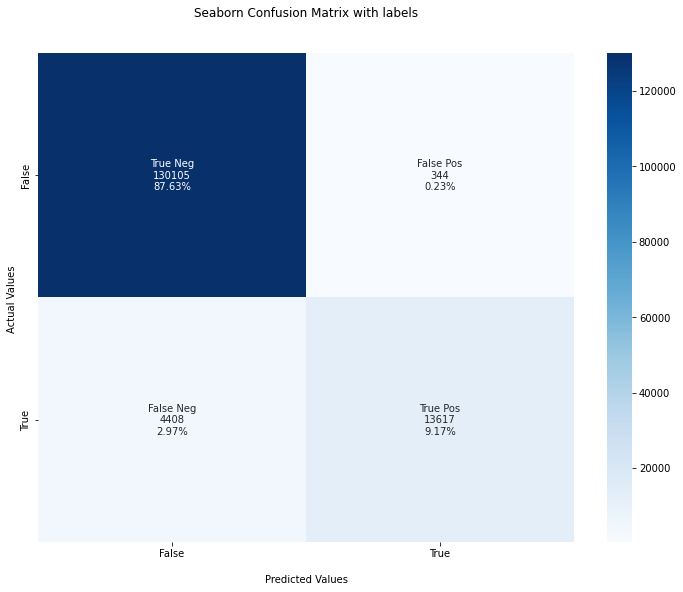

In [ ]:
#Generate the confusion matrix
cf_matrix = confusion_matrix(y_test, y_predict)

group_names = ['True Neg','False Pos','False Neg','True Pos']

group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]

group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]

labels = np.asarray(labels).reshape(2,2)
plt.figure(figsize=(12,9))

ax = sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()


Решение
-6.15+0.84*FIT101+1.98*LIT101+0.95* MV101-3.59*P101+7.47*P102-2.40*AIT203+3.65*FIT201+7.16* MV201-3.25* P201-4.62*P203+3.31* P204+1.67*P205+0.60*P206+10.54*DPIT301-3.33*FIT301-3.94*LIT301+5.50*MV301+2.12*MV302-4.20* MV303+6.47*MV304-2.79*P302+4.26*AIT401-1.09*AIT402-9.52*FIT401-1.11*LIT401+12.02*P402-11.33*P403-1.80*UV401-3.30*AIT501+6.46*AIT502-2.45*AIT503+10.07*AIT504-37.42*FIT501-0.39*FIT502+45.55*FIT503-19.26*FIT504+2.69*PIT502+4.44*PIT503+0.28*FIT601-1.45*P602


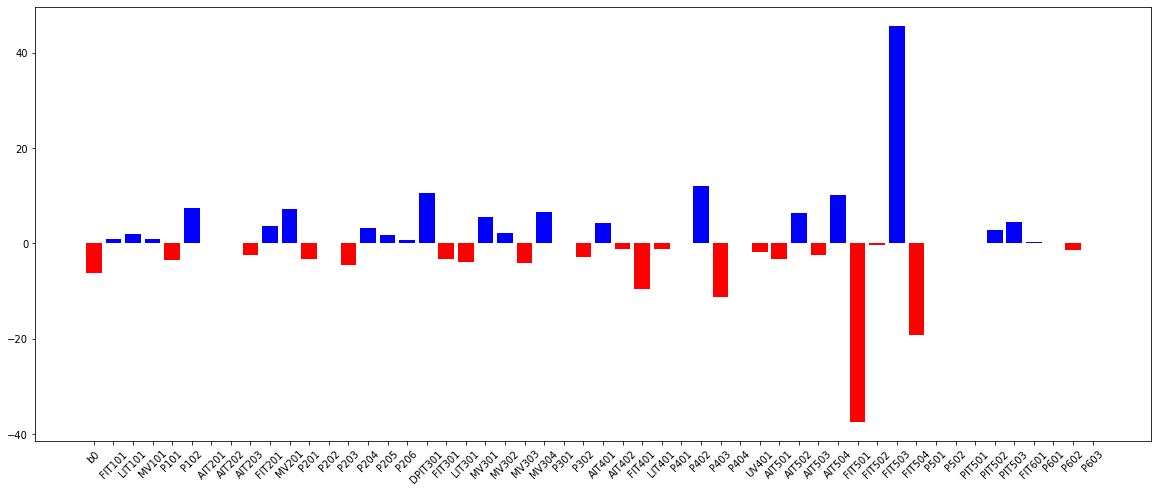

In [ ]:
plt.figure(figsize=(20,8))

B0=LogReg.intercept_[0]
B=LogReg.coef_[0]

features_names=X.drop(columns=('Timestamp')).columns
sign=['+','-']
line='{:.2f}'.format(B0)
for p,(fn,b) in enumerate(zip(features_names,B)):
  if np.abs(b)>0:
    line=line+sign[int(0.5*(np.sign(b)-1))]+'{:.2f}*'.format(np.abs(b))+fn

print('Решение')
print(line)

weights_vis(B, B0, features_names)


In [ ]:
# confusion matrix
print(classification_report(y_test, y_predict, target_names=['Normal','Attack']))

              precision    recall  f1-score   support

      Normal       0.97      1.00      0.98    130449
      Attack       0.98      0.76      0.85     18025

    accuracy                           0.97    148474
   macro avg       0.97      0.88      0.92    148474
weighted avg       0.97      0.97      0.97    148474



In [ ]:
# Кроссвалидация
scoring = {'Accuracy': 'accuracy',
           'F1': 'f1',
           'Precision': 'precision',
           'Recall': 'recall'}
           
scores = cross_validate(LogReg, X_train, y_train,
                      scoring=scoring, cv=StratifiedKFold(n_splits=3, shuffle = True, random_state=42))


print('Результаты Кросс-валидации')
DF_cv_logreg = pd.DataFrame(scores)
display(DF_cv_logreg)
print('\n')
print(DF_cv_logreg.mean()[2:])

# Задача 2. Обучение без учителя

## PCA

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
df = data.drop(columns=(['Timestamp', 'Normal/Attack']))

In [ ]:
scaler    = MinMaxScaler()
X = scaler.fit_transform(df)
pca = PCA(n_components=5)
labels = data['Normal/Attack']

X_new = pca.fit_transform(X)
print(X_new.shape)

# x,y,z,w,e = 0,1,2,3,4
# plt.figure(figsize=(18,10))
# plt.subplot(321); plt.scatter(X_new[:,x],X_new[:,y], c =labels, alpha = 0.7); plt.title("0-1")
# plt.subplot(322); plt.scatter(X_new[:,x],X_new[:,z], c =labels, alpha = 0.7); plt.title("0-2")
# plt.subplot(323); plt.scatter(X_new[:,y],X_new[:,z], c =labels, alpha = 0.7); plt.title("1-2")
# plt.subplot(324); plt.scatter(X_new[:,y],X_new[:,w], c =labels, alpha = 0.7); plt.title("1-3")
# plt.subplot(325); plt.scatter(X_new[:,x],X_new[:,w], c =labels, alpha = 0.7); plt.title("0-3")
# plt.subplot(326); plt.scatter(X_new[:,x],X_new[:,e], c =labels, alpha = 0.7); plt.title("0-4")

plt.show();

(449919, 5)


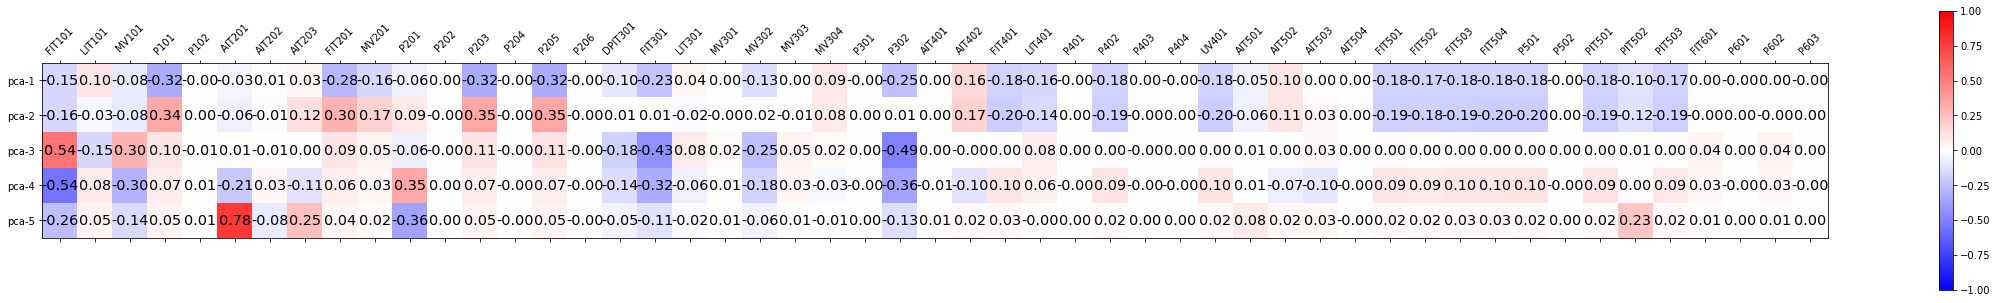

In [ ]:
fig=plt.figure(figsize=(40,5))
W = pca.components_
pca_names = ['pca-'+str(x+1) for x in range(W.shape[0])]
plt.matshow(W.astype(float),cmap='bwr',vmin=-1,vmax=1, fignum=1)
for (i, j), z in np.ndenumerate(W):
    plt.text(j, i, '{:0.2f}'.format(z), ha='center', va='center', color = 'k', fontsize = 'x-large')
plt.xticks(np.arange(0, W.shape[1]), df.columns,rotation = 45)
plt.yticks(np.arange(0, W.shape[0]),pca_names)
plt.colorbar();

In [ ]:
EV=pca.explained_variance_ratio_
print('Объясненная дисперсия на Главную Компоненту: {}'.format(EV))

Объясненная дисперсия на Главную Компоненту: [0.51752136 0.18616081 0.0908641  0.06668773 0.05913933]


Построение графика объясненной дисперсии

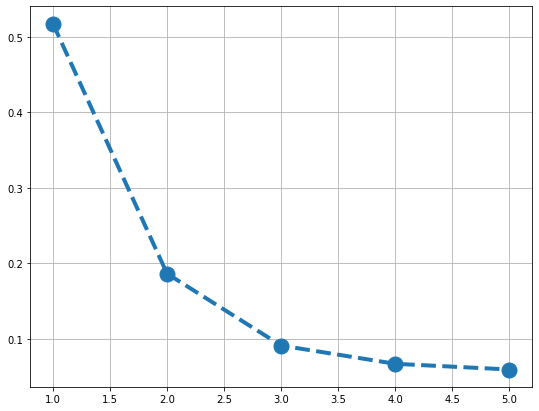

In [ ]:
fig = plt.figure( figsize=(9,7) )
plt.plot(np.array(range(len(EV)))+1,EV,'o--',linewidth=4, markersize=15)
plt.grid()

Построение графика кумулятивной объясненной дисперсии

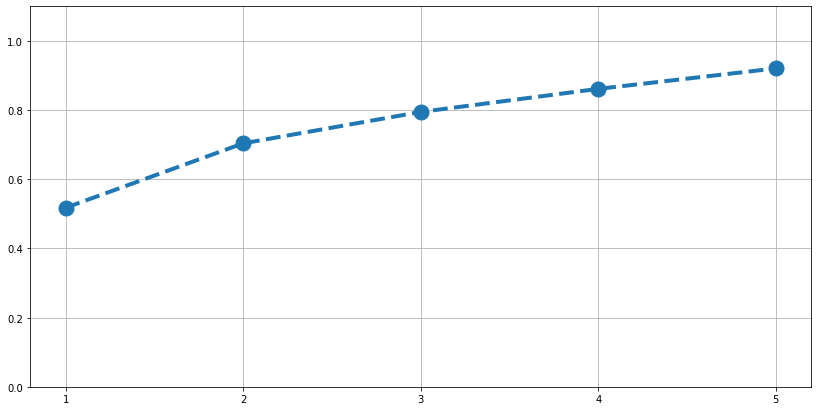

In [ ]:
fig = plt.figure( figsize=(14,7))
plt.plot(np.array(range(len(EV)))+1,np.cumsum(EV),'o--',linewidth=4, markersize=15)
plt.grid()
plt.xticks(np.array(range(len(EV)))+1)
plt.ylim(0,1.1);

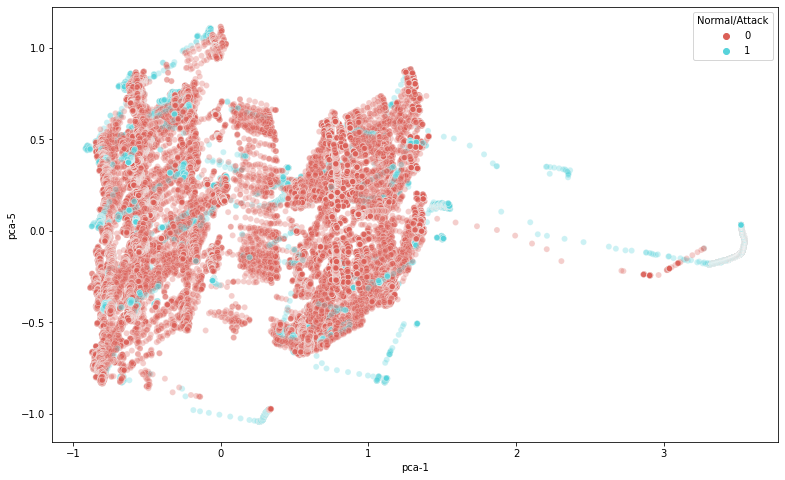

In [ ]:
#@title Построение двух разных Главных Компонент { run: "auto" }
pca_x =  1 #@param {type:"integer", min:1, max:51, step:1}
pca_y = 5 #@param {type:"integer", min:1, max:51, step:1}
y = 'Normal/Attack'

DF = data.copy()
DF[pca_names] = X_new 

plt.figure(figsize=(13,8))
sns.scatterplot(
    x='pca-'+str(pca_x), y='pca-'+str(pca_y),
    hue=y,
    palette=sns.color_palette("hls", DF[y].nunique()),
    data=DF,
    legend="full",
    alpha=0.3,);

## K-means

In [ ]:
from sklearn.cluster import KMeans

test error
Accuracy: 0.7511
F1 : 0.4202


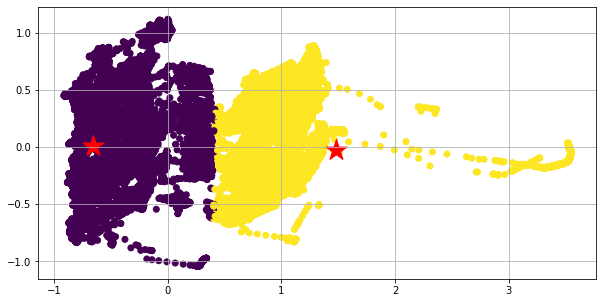

In [ ]:
pca_x = 1 
pca_y = 5
k = 2

X_cluster = DF.loc[:,['pca-'+str(pca_x), 'pca-'+str(pca_y)]].values

km = KMeans(n_clusters=k)
km.fit(X_cluster)
centroids = km.cluster_centers_
labels = km.fit_predict(X_cluster)
label_centroids = km.fit_predict(centroids)
      
y_predict = labels.tolist()
y_test = data['Normal/Attack']

plt.figure(figsize=(10, 5))
plt.scatter(X_cluster[:, 0], X_cluster[:, 1], c=labels)
plt.scatter(centroids[:, 0], centroids[:, 1], marker='*', c='r', s=490)
plt.grid();

print('test error')
print('Accuracy: %.4f' % acc(y_predict,y_test))
print('F1 : %.4f' %  f1(y_predict,y_test,average='binary'))

In [ ]:
def get_best_result(min_comp= 1, max_comp= 5, metrica = 'f1') -> dict:
  dict_res = {}
  for i in range(min_comp,max_comp+1):
    for e in range(min_comp,max_comp+1):
      pca_x = i 
      pca_y = e 
      k = 2

      X_cluster = DF.loc[:,['pca-'+str(pca_x), 'pca-'+str(pca_y)]].values

      km = KMeans(n_clusters=k)
      km.fit(X_cluster)
      centroids = km.cluster_centers_
      labels = km.fit_predict(X_cluster)
      label_centroids = km.fit_predict(centroids)

      y_predict = labels.tolist()
      y_test = data['Normal/Attack']

      if metrica == 'f1':
        dict_res[f'{i}-{e}'] = round(f1(y_predict,y_test,average='binary'), 4)
      else: 
        dict_res[f'{i}-{e}'] = round(acc(y_predict,y_test),4)

  best_res = max(dict_res, key=dict_res.get)
  res = best_res, dict_res[best_res]

  return res

In [ ]:
get_best_result(min_comp= 1, max_comp= 5, metrica = 'acc')

In [ ]:
# confusion matrix
print(classification_report(y_test, y_predict, target_names=['Normal','Attack']))

## Спектральная кластеризация

In [ ]:
from sklearn.cluster import SpectralClustering 

In [ ]:
DF

,Timestamp,FIT101,LIT101,MV101,P101,P102,AIT201,AIT202,AIT203,FIT201,...,FIT601,P601,P602,P603,Normal/Attack,pca-1,pca-2,pca-3,pca-4,pca-5
0,2015-12-28 10:00:00,2.427057,522.8467,2,2,1,262.0161,8.396437,328.6337,2.445391,...,0.000128,1,1,1,0,-0.799357,0.131220,0.122552,-0.374347,0.467952
1,2015-12-28 10:00:01,2.446274,522.8860,2,2,1,262.0161,8.396437,328.6337,2.445391,...,0.000128,1,1,1,0,-0.803102,0.127319,0.126109,-0.376907,0.466455
2,2015-12-28 10:00:02,2.489191,522.8467,2,2,1,262.0161,8.394514,328.6337,2.442316,...,0.000128,1,1,1,0,-0.805060,0.124477,0.134631,-0.385317,0.462521
3,2015-12-28 10:00:03,2.534350,522.9645,2,2,1,262.0161,8.394514,328.6337,2.442316,...,0.000128,1,1,1,0,-0.805814,0.123685,0.143462,-0.395118,0.458069
4,2015-12-28 10:00:04,2.569260,523.4748,2,2,1,262.0161,8.394514,328.6337,2.443085,...,0.000128,1,1,1,0,-0.807827,0.121620,0.150304,-0.401875,0.454832
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
449914,2016-02-01 14:59:55,2.559972,519.5495,2,2,1,168.0979,8.638683,301.9226,2.459488,...,0.000000,1,1,1,0,-0.806811,0.269268,0.069415,0.196675,-0.819675
449915,2016-02-01 14:59:56,2.549082,520.4131,2,2,1,168.0979,8.638683,301.9226,2.459488,...,0.000000,1,1,1,0,-0.803792,0.272389,0.067083,0.197636,-0.818920
449916,2016-02-01 14:59:57,2.531467,520.6878,2,2,1,168.0979,8.638683,301.9226,2.460129,...,0.000000,1,1,1,0,-0.802362,0.273742,0.064025,0.201372,-0.817174
449917,2016-02-01 14:59:58,2.521218,520.7271,2,2,1,168.0979,8.638683,301.9226,2.460129,...,0.000000,1,1,1,0,-0.801889,0.274136,0.062188,0.203598,-0.816155


In [ ]:
pca_x = 1 
pca_y = 5
k = 2 

sc = SpectralClustering()

X_cluster = DF.loc[:,['pca-'+str(pca_x), 'pca-'+str(pca_y)]].values

sc.fit(X_cluster)
labels = sc.fit_predict(X_cluster)

y_predict = labels.tolist()
y_test = data['Normal/Attack']

print('test error')
print('Accuracy: %.4f' % acc(y_predict,y_test))
print('F1 : %.4f' %  f1(y_predict,y_test,average='binary'))

In [ ]:
X_cluster

NameError: ignored